In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import imshow
import math
import numpy as np
from glob import glob

각 클래스의 이미지들이 저장되어 있는 폴더에서 데이터 불러오기 <br>
InceptionNet 입력 포맷 : 299x299

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = [image.load_img(p, target_size=(299, 299))
          for p in glob('/content/drive/MyDrive/CNN/b_e/b/*jpg') + glob('/content/drive/MyDrive/CNN/b_e/e/*jpg')]
vector = np.asarray([image.img_to_array(img) for img in images])
# glob() : 특정 폴더에 존재하는 파일들의 경로를 읽어 옮

In [ ]:
vector.shape

(300, 299, 299, 3)

InceptionNet (version3) 호출

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=True)

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

합성곱층 (convolutional layers) 부분에서 출력하는 feature 정보
<br> 합성곱층에 해당하는 부분만 추출. <br>
Model 클래스를 이용해서 입력부분과 출력부분 지정

In [ ]:
basic_model1 = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)


# inputs=base_model : InceptionV3 모델의 입력과 동일

# outputs=base_model.get_layer('avg_pool').output:
       # 모델의 출력 InceptionV3 모델의 'avg_pool' 레이어의 출력

In [ ]:
basic_model1.summary()

In [ ]:
vectors = basic_model1.predict(preprocess_input(vector))
# avg_pool 층이 출력하는 feature 정보를 얻음
# preprocess_input() : 입력 데이터 값 normalization

10/10 [==============================] - 83s 8s/step


In [ ]:
vectors.shape
#이미지 별 2048개의 피처 정보

(300, 2048)

In [ ]:
vectors[0]

array([0.11954156, 0.22079125, 1.4177456 , ..., 0.24039304, 0.35921562,
       0.8749426 ], dtype=float32)

In [ ]:
# vectors1 = basic_model1.predict(vector/255)
# 입력값 0 ~ 1로 변환

In [ ]:
len(vectors)

300

종속변수 생성 <--- 폴더 정보 사용 <br>
‘b’ 폴더에 있는 이미지의 종속변수 값을 1로 , <br>
‘e’ 폴더에 있는 이미지의 종속변수 값을 0으로

In [ ]:
labels = [1] * 150 + [0] * 150
# labels = [1] * 179 + [0] * 142
# b => 1, e => 0 으로 labeling
# 첫번째 폴더에 존재하는 이미지들(b)의 정답을 1로,
# 두번째 폴더에 존재하는 이미지들(e)의 정답을 0으로 설정

In [ ]:
print(labels)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# 학습 데이터와 평가 데이터 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, labels, test_size=0.2)
# b => 1, e => 0

In [ ]:
X_train.shape

(240, 2048)

In [ ]:
len(y_train)

240

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_p1 = LogisticRegression(C=1, penalty='l1', solver='saga', max_iter=10000)
lr_p1.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='saga')

In [ ]:
lr_p1.score(X_test, y_test)

0.7166666666666667

In [ ]:
lr_p2 = LogisticRegression(C=1, penalty='l2', solver='saga', max_iter=1000)
lr_p2.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, solver='saga')

In [ ]:
lr_p2.score(X_test, y_test)

0.7333333333333333

In [ ]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
lr_p2.predict_proba(vectors[0].reshape(1, -1))

array([[0.038487732, 0.96151227 ]], dtype=float32)

In [ ]:
lr_p2.predict(vectors[0].reshape(1, -1))

array([1])

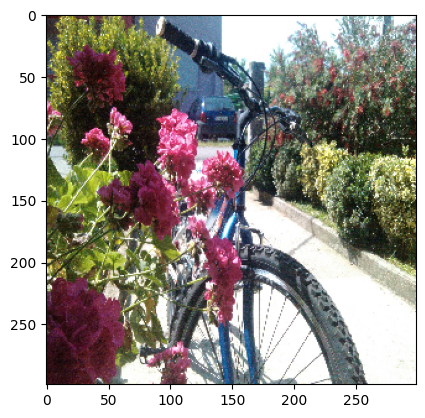

In [ ]:
imshow(np.asarray(images[0]))

## 다른 분류 알고리즘 적용

In [ ]:
from sklearn import svm


In [ ]:
import xgboost as xgb
